# Initialization method of Archetypal Analysis comparison

In [1]:
from time import time

import numpy as np
import pandas as pd

from Fungsi1 import *

from AA_Original_init import *

from PIL import Image
import sewar

### Compare duration for different k experiments
We can test Archetypal Analysis with different k value.

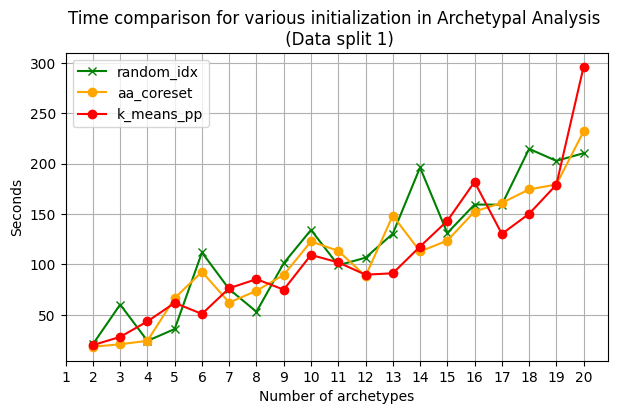

In [3]:
#The initialize parameter : random, random_idx, furthest_sum, furthest_first, k_means_pp, aa_pp, and aa_coreset

# Load data from Excel files
data1 = pd.read_excel("results/random_idx/1/UWHVF_random_idx1_test_duration.xlsx")  
data2 = pd.read_excel("results/aa_coreset/1/UWHVF_aa_coreset1_test_duration.xlsx")  
data3 = pd.read_excel("results/k_means_pp/1/UWHVF_k_means_pp1_test_duration.xlsx")  

# Insert NaN at the start to shift data plotting to start from x=2
nan_padding = [np.nan]  # Creates an empty space at x=1

# Adjusted data with a leading NaN for shifting
dur1 = nan_padding + list(data1['Duration'])
dur2 = nan_padding + list(data2['Duration'])
dur3 = nan_padding + list(data3['Duration'])

# Create the x-axis indices (starts from 1 but first value is empty)
x_values = np.arange(1, len(data2) + 2)  # +2 to account for NaN shift

# Plot the first dataset
plt.figure(figsize=(7, 4))
plt.plot(x_values, dur1, label="random_idx", marker='x', color='green')

# Plot the second dataset
plt.plot(x_values, dur2, label="aa_coreset", marker='o', color='orange')

# Plot the third dataset
plt.plot(x_values, dur3, label="k_means_pp", marker='o', color='red')

# Set x-axis ticks correctly
plt.xticks(np.arange(1, len(data2) + 2))  # Ensure labels start from 1

# Add labels and title
plt.xlabel("Number of archetypes")
plt.ylabel("Seconds")
plt.title("Time comparison for various initialization in Archetypal Analysis \n (Data split 1)")
plt.legend()
plt.grid()

# Saving the figure.
plt.savefig('results/UWHVF_test_duration.png')

# Show the plot
plt.show()

### Compare RSS for different k experimentsWe can use elbow method to find the optimal k value that will be used. .

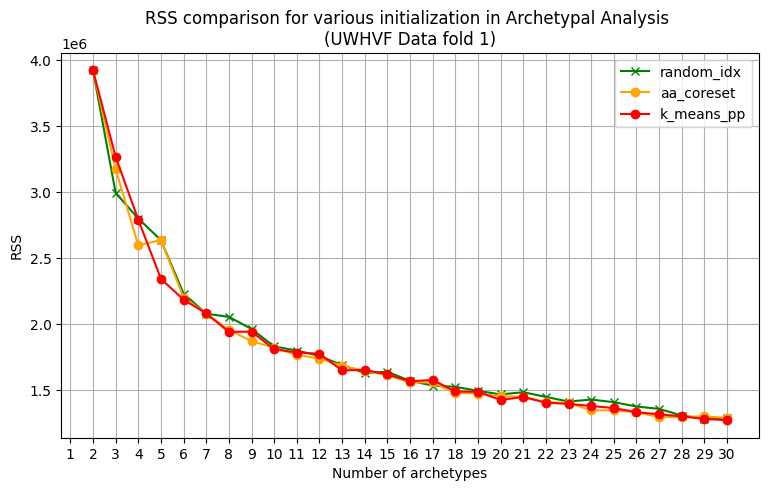

In [5]:
#The initialize parameter : random, random_idx, furthest_sum, furthest_first, k_means_pp, aa_pp, and aa_coreset

# Load data from Excel files
data1 = pd.read_excel("results/random_idx/1/UWHVF_random_idx1_test_RSS.xlsx")  
data2 = pd.read_excel("results/aa_coreset/1/UWHVF_aa_coreset1_test_RSS.xlsx")  
data3 = pd.read_excel("results/k_means_pp/1/UWHVF_k_means_pp1_test_RSS.xlsx")  

# Insert NaN at the start to shift data plotting to start from x=2
nan_padding = [np.nan]  # Creates an empty space at x=1

# Adjusted data with a leading NaN for shifting
dur1 = nan_padding + list(data1['RSS'])
dur2 = nan_padding + list(data2['RSS'])
dur3 = nan_padding + list(data3['RSS'])

# Create the x-axis indices (starts from 1 but first value is empty)
x_values = np.arange(1, len(data2) + 2)  # +2 to account for NaN shift

# Plot the first dataset
plt.figure(figsize=(9, 5))
plt.plot(x_values, dur1, label="random_idx", marker='x', color='green')

# Plot the second dataset
plt.plot(x_values, dur2, label="aa_coreset", marker='o', color='orange')

# Plot the third dataset
plt.plot(x_values, dur3, label="k_means_pp", marker='o', color='red')

# Set x-axis ticks correctly
plt.xticks(np.arange(1, len(data2) + 2))  # Ensure labels start from 1

# Add labels and title
plt.xlabel("Number of archetypes")
plt.ylabel("RSS")
plt.title("RSS comparison for various initialization in Archetypal Analysis \n(UWHVF Data fold 1)")
plt.legend()
plt.grid()

# Saving the figure.
plt.savefig('results/UWHVF_test_RSS.png')

# Show the plot
plt.show()

After examining the RSS values from k = 2 to k = 30, we observed that the RSS value continues to decrease as k increases. Using the elbow method, where k is chosen at the point where the decrease in RSS becomes less significant and forms an "elbow" or a "knee" in the curve. From the candidate k values, we further did qualitative analysis by visually inspecting the archetypes. Based on this combined assessment, we decided to use k = 19 as the optimal k. 

### Comparison for different initialization methods.

[https://im.ge/i/oriAA-UWHVF-1split-Sens-10p-test-RSS-1.JPeOaG](https://im.ge/i/oriAA-UWHVF-1split-Sens-10p-test-RSS-1.JPeOaG)

Actually, there is no significant difference in RSS values between the different initialization methods in Archetypal Analysis. Sometimes, the minimum value alternates between methods. Therefore, if we rely solely on the RSS value, it is somewhat difficult to determine which initialization method is the best.

Therefore, we visualized the archetypes produced by each initialization method. Below is the visualization of the results for k = 19 for each initialization method.

#### aa_coreset
[AA_UWHVF_aa_coreset_Sens_19_combined.png](https://im.ge/i/AA-UWHVF-aa-coreset-Sens-19-combined-r.JPeEv1)

#### furthest_first
[AA_UWHVF_furthest_first_Sens_19_combined.png](https://im.ge/i/oriAA-UWHVF-furthest-first-1split-Sens-10p-19-combined-r.JtMQJX)

#### furthest_sum
[AA_UWHVF_furthest_sum_Sens_19_combined.png](https://im.ge/i/oriAA-UWHVF-furthest-sum-1split-Sens-10p-19-combined-r.JtMoS8)

#### k_means_pp
[AA_UWHVF_k_means_pp_Sens_19_combined.png](https://im.ge/i/AA-UWHVF-k-means-pp-Sens-19-combined-r.JPeRgT)

#### random_idx
[AA_UWHVF_random_idx_Sens_19_combined.png](https://im.ge/i/AA-UWHVF-random-idx-Sens-19-combined-r.JPeJrS)

Then, after a discussion with an ophthalmologist, the proposed methodology uses aa_coreset, k_means_pp, and random_idx, as the archetypes generated produce more diverse patterns.

### Choosing threshold value for pairwise comparison using SSIM 

SSIM (Structural Similarity Index Measure) values range from 0, meaning very different, to 1, meaning identical. Our goal in performing pairwise comparison is to identify similar patterns, from which one can be selected as a representative pattern. To determine similarity, we hypothesize that patterns with an SSIM value greater than 0.9 are considered similar.

We used visual observation of the archetype visualizations in the pairwise comparison. If the chosen threshold is 0.9, then the two patterns below would be considered the same, even though they are actually different.

<a href="https://im.ge/i/JtMU5W"><img src="https://i.im.ge/2025/07/31/JtMU5W.img-011.png" alt="img 011" border="0" /></a>
<a href="https://im.ge/i/JtMjJG"><img src="https://i.im.ge/2025/07/31/JtMjJG.img-008.png" alt="img 008" border="0" /></a>

If we choose a threshold of 0.91, then the following two pattern examples would be considered similar even though they are actually different.

<a href="https://im.ge/i/JtMU5W"><img src="https://i.im.ge/2025/07/31/JtMU5W.img-011.png" alt="img 011" border="0" /></a>
<a href="https://im.ge/i/JtMwdx"><img src="https://i.im.ge/2025/07/31/JtMwdx.img-010.png" alt="img 010" border="0" /></a>

And if we choose a threshold of 0.92, then the two example images below would be considered the same, even though their structures are still different.

<a href="https://im.ge/i/JtMU5W"><img src="https://i.im.ge/2025/07/31/JtMU5W.img-011.png" alt="img 011" border="0" /></a>
<a href="https://im.ge/i/JtM6Pa"><img src="https://i.im.ge/2025/07/31/JtM6Pa.img-029.png" alt="img 029" border="0" /></a>

Finally, we arrived at 0.93 as the threshold value for identifying similar patterns, based on an empirical process and expert review. As an example, the two images below would be considered the same using the 0.93 threshold. Structurally, the patterns are indeed similar.

<a href="https://im.ge/i/JtMtuy"><img src="https://i.im.ge/2025/07/31/JtMtuy.img-016.png" alt="img 016" border="0" /></a>
<a href="https://im.ge/i/JtMy9S"><img src="https://i.im.ge/2025/07/31/JtMy9S.img-033.png" alt="img 033" border="0" /></a>